# Coronavirus/COVID-19 Timseries Forecasting

- ~~[GitHub Repo](https://github.com/jirvingphd/playing-with-coronavirus-data)~~
- James M. Irivng, Ph.D.
- james.irving.phd@gmail.com

> **~~NOTE: DATA ACQUISITION IS BEING RE-WORKED IN "Exploring Options for Replacing Covid Tracking Project Data_08-2021.ipnynb"~~** -08/12/21

In [1]:
## Fetch new data (if True (long process - ~2 mins)
RUN_FULL_WORKFLOW=True

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coronavirus/COVID-19-Timseries-Forecasting" data-toc-modified-id="Coronavirus/COVID-19-Timseries-Forecasting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coronavirus/COVID-19 Timseries Forecasting</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li></ul></li><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OBTAIN</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#[To-Be-Updated]-COPIED-legacy-book-2-on--09/06/21" data-toc-modified-id="[To-Be-Updated]-COPIED-legacy-book-2-on--09/06/21-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>[To Be Updated] COPIED legacy book 2 on  09/06/21</a></span></li><li><span><a href="#EDA---Comparing-States" data-toc-modified-id="EDA---Comparing-States-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA - Comparing States</a></span><ul class="toc-item"><li><span><a href="#FL" data-toc-modified-id="FL-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>FL</a></span><ul class="toc-item"><li><span><a href="#Calc-Delta-Cases/Deaths" data-toc-modified-id="Calc-Delta-Cases/Deaths-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Calc Delta Cases/Deaths</a></span></li></ul></li></ul></li><li><span><a href="#Time-Series-Modeling" data-toc-modified-id="Time-Series-Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Time Series Modeling</a></span><ul class="toc-item"><li><span><a href="#MD" data-toc-modified-id="MD-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>MD</a></span><ul class="toc-item"><li><span><a href="#MD---Cases-New" data-toc-modified-id="MD---Cases-New-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>MD - Cases-New</a></span></li><li><span><a href="#MD---Hospitalized-Currently" data-toc-modified-id="MD---Hospitalized-Currently-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>MD - Hospitalized Currently</a></span></li></ul></li><li><span><a href="#🚨-BOOKMARK:-Data-Quality-Issue---Deaths" data-toc-modified-id="🚨-BOOKMARK:-Data-Quality-Issue---Deaths-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>🚨 BOOKMARK: Data Quality Issue - Deaths</a></span><ul class="toc-item"><li><span><a href="#MD---Deaths-New" data-toc-modified-id="MD---Deaths-New-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>MD - Deaths-New</a></span></li></ul></li></ul></li><li><span><a href="#Function-For-Any-Given-State/-Column" data-toc-modified-id="Function-For-Any-Given-State/-Column-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Function For Any Given State/ Column</a></span></li><li><span><a href="#09/09/21-TO-DO:-update-project_functions-with-new-make_time_series_model" data-toc-modified-id="09/09/21-TO-DO:-update-project_functions-with-new-make_time_series_model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><strong>09/09/21 TO DO: update project_functions with new <code>make_time_series_model</code></strong></a></span><ul class="toc-item"><li><span><a href="#✔-TO-DO:-make-remove_outliers-into-a-helper-function" data-toc-modified-id="✔-TO-DO:-make-remove_outliers-into-a-helper-function-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span><strong>✔ TO DO: make remove_outliers into a helper function</strong></a></span></li></ul></li><li><span><a href="#Making-Plotly-Figures-for-App" data-toc-modified-id="Making-Plotly-Figures-for-App-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Making Plotly Figures for App</a></span></li><li><span><a href="#@interact" data-toc-modified-id="@interact-10"><span class="toc-item-num">10&nbsp;&nbsp;</span><code>@interact</code></a></span></li><li><span><a href="#APPENDIX" data-toc-modified-id="APPENDIX-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>APPENDIX</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#def-modeling-functions" data-toc-modified-id="def-modeling-functions-11.0.1"><span class="toc-item-num">11.0.1&nbsp;&nbsp;</span><code>def</code> modeling functions</a></span></li></ul></li></ul></li></ul></div>

# Business Problem

- Covid-19 and the various strains that have since emerged has upended modern life and fundamental changed how we function as a society.
- Part of what has made it difficult to tackle the pandemic is due to differences between states, state laws/policies, and a lack of public understanding about the predictability of the surges in cases. 


### Goal

- The goal of this notebook is to produce a workflow for producing forecasts of the following metrics at least 1 week ahead of time. 
    - Confirmed Cases
    - Number of Deaths
    - ICU Capacity
    
- The stretch goal for the project is to create a streamlit dashboard for getting state-level forecasts for any state in the US, using fresh daily data.
    

### Methodology

- To select 3-5 prototypical states representing very different time courses/
- Initial Thoughts:
    - NY
    - TX
    - FL
    - MD
    - LA

- See `data_acquisition.py`> `FULL_WORKFLOW()` and `1_Replacing Covid Tracking Project - Simplified Workflow.ipynb` for details (for now)


# OBTAIN

## Imports

In [2]:
# !pip install -U pmdarima
!pip install -U fsds

from fsds.imports import *

fsds v0.4.4 loaded.


Package,Handle,Version,Documentation,Imported
pandas,pd,1.1.3,https://pandas.pydata.org/docs/,Y
fsds,fs,0.4.4,https://fs-ds.readthedocs.io/en/latest/,Y
numpy,np,1.19.5,https://numpy.org/doc/stable/reference/,Y
matplotlib,mpl,3.3.1,https://matplotlib.org/stable/api/index.html,Y
matplotlib.pyplot,plt,,https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot,Y
seaborn,sns,0.11.0,https://seaborn.pydata.org/api.html,Y
IPython.display,dp,,https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html,Y
sklearn,,0.23.2,,N


In [3]:
## Custom Functions and Classes
%load_ext autoreload
%autoreload 2
# import project_functions as fn
import fsds.pandemic as fn

In [4]:
import os,glob,sys,joblib,zipfile,json
import re

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

plt.rcParams['figure.figsize'] = (12,6)
pd.set_option('display.max_columns',0)
# fs.check_package_versions(['statsmodels'],fpath=True)

In [5]:
### FORECAST SPECIFIC FUNCTIONS
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

fs.check_package_versions(['statsmodels','pmdarima'],fpath=False)

,Package,Version
0,statsmodels,0.12.2
1,pmdarima,1.8.2


In [6]:
import statsmodels
print(f"Statsmodels version: {statsmodels.__version__}")

import pmdarima
print(f"pmdarima version: {pmdarima.__version__}")

Statsmodels version: 0.12.2
pmdarima version: 1.8.2


## Data

In [7]:
## Using new savedd FILE_DIRECTORIES
import os,json,glob

with open("FILE_DIRECTORY.json") as f:
    FPATHS = json.load(f)
FPATHS

{'fpath_raw': './data_raw/',
 'fpath_clean': './data/',
 'fpath_reference': './reference_data/',
 'fpath_state_data': './data/state_data/',
 'fpath_final_states': './data/FINAL_STATES.joblib',
 'fpath_final_df_csv': './data/FINAL_STATES.csv.gz',
 'fpath_final_df_pickle': './data/FINAL_STATES.pickle',
 'name_of_fpath_vars': ['fpath_raw',
  'fpath_clean',
  'fpath_reference',
  'fpath_state_data',
  'fpath_final_states',
  'fpath_final_df_csv',
  'fpath_final_df_pickle',
  'name_of_fpath_vars']}

In [8]:
for path_name,fpath in FPATHS.items():
    try:
        
        found_files =  sorted(os.listdir(fpath))
        print(f"\n[i] Files stored in {path_name}:")
        [print("\t",i,x) for i,x in enumerate(found_files)]
    except:
        pass



[i] Files stored in fpath_raw:
	 0 .ipynb_checkpoints
	 1 CONVENIENT_us_metadata.csv
	 2 RAW_us_confirmed_cases.csv
	 3 RAW_us_deaths.csv
	 4 covid19-data-from-john-hopkins-university.zip
	 5 hospital_data.csv

[i] Files stored in fpath_clean:
	 0 COLUMNS.joblib
	 1 FINAL_STATES.csv.gz
	 2 FINAL_STATES.joblib
	 3 FINAL_STATES.pickle
	 4 STATE_DICT.joblib
	 5 combined_us_states_full_data.csv
	 6 state_data
	 7 us_states_cases_deaths.csv
	 8 us_states_daily_cases_deaths.csv

[i] Files stored in fpath_reference:
	 0 COLUMNS.joblib
	 1 population-by-country-2020.zip
	 2 state_codes_to_names_map.joblib
	 3 state_names_to_codes_map.joblib
	 4 united_states_abbreviations.csv
	 5 us_metadata_counties.csv
	 6 us_metadata_states.csv

[i] Files stored in fpath_state_data:


In [9]:
# RUN_FULL_WORKFLOW=True

In [10]:
# ## making mapper dict to rename new columns
# new_to_match_old_map = {
#     'Deaths':'death',
#     'Cases':'positive',
#     'total_adult_patients_hospitalized_confirmed_covid':'hospitalizedCurrently',
# 'adult_icu_bed_covid_utilization_numerator':'inIcuCurrently'}
# ## making mapper dict to rename new columns
# new_to_final_names = {
#     'Deaths':'Deaths',
#     'Cases':'Cases',
#     'total_adult_patients_hospitalized_confirmed_covid':'Hospitalized Currently',
# 'adult_icu_bed_covid_utilization_numerator':'ICU-Covid Currently'}
# list(new_to_final_names.keys())

In [11]:
FPATHS

{'fpath_raw': './data_raw/',
 'fpath_clean': './data/',
 'fpath_reference': './reference_data/',
 'fpath_state_data': './data/state_data/',
 'fpath_final_states': './data/FINAL_STATES.joblib',
 'fpath_final_df_csv': './data/FINAL_STATES.csv.gz',
 'fpath_final_df_pickle': './data/FINAL_STATES.pickle',
 'name_of_fpath_vars': ['fpath_raw',
  'fpath_clean',
  'fpath_reference',
  'fpath_state_data',
  'fpath_final_states',
  'fpath_final_df_csv',
  'fpath_final_df_pickle',
  'name_of_fpath_vars']}

In [12]:
os.listdir(FPATHS['fpath_clean'])

['us_states_daily_cases_deaths.csv',
 'state_data',
 'combined_us_states_full_data.csv',
 'us_states_cases_deaths.csv',
 'STATE_DICT.joblib',
 'FINAL_STATES.joblib',
 'FINAL_STATES.csv.gz',
 'COLUMNS.joblib',
 'FINAL_STATES.pickle']

In [13]:
## Uncomment Cell to acquire new data
if RUN_FULL_WORKFLOW:
    df_states,STATES = fn.data_acquisition.FULL_WORKFLOW(merge_hospital_data=True)
    ## renaming since merge_hofspital_data=True
#     DF = df_states.copy()
#     print(STATES.keys())    
    
else:
    print(f"[i] Using previously downloaded data...")
    df_states = pd.read_pickle(FPATHS['fpath_final_df_pickle'])
    
#     with open(FPATHS['fpath_final_states']) as f:
    STATES = joblib.load(FPATHS['fpath_final_states'])
#     df_states = pd.read_csv(os.path.join(fpath_clean,
#                                          'combined_us_states_full_data.csv'))
#     STATES = joblib.load(os.path.join(fpath_clean,'STATE_DICT.joblib'))

display(df_states.head())
print(STATES.keys())

========= RUNNING FULL WORKFLOW =========
[i] Retrieving kaggle dataset: antgoldbloom/covid19-data-from-john-hopkins-university
- Loading data from RAW_us_confirmed_cases.csv
- Loading data from RAW_us_deaths.csv
[i] Retrieving hospital data from https://healthdata.gov/resource/g62h-syeh.csv
[i] Workflow completed.
	Run time=0:00:39.334659 sec.
[i]The final files of note:
	./data/combined_us_states_full_data.csv
	./data/STATE_DICT.joblib
[i] Final joined data (DF) saved as ./data/FINAL_STATES.csv.gz
[i] Final joined data (DF) saved as ./data/FINAL_STATES.pickle


Deaths  Cases  Hospitalized Currently  ICU-Covid Currently  Deaths-New  Cases-New
   Date                                                                                         
AK 2020-03-23       0     39                     0.0                  0.0         0.0        0.0
   2020-03-24       0     43                     0.0                  0.0         0.0        4.0
   2020-03-25       1     50                     0.0                  0.0         1.0        7.0
   2020-03-26       1     64                     0.0                  0.0         0.0       14.0
   2020-03-27       1     75                     0.0                  0.0         0.0       11.0

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


# [To Be Updated] COPIED legacy book 2 on  09/06/21

# EDA - Comparing States

## FL

In [14]:
FL = STATES['FL'].copy()
FL

,Deaths,Cases,Hospitalized Currently,ICU-Covid Currently,Deaths-New,Cases-New
Date,,,,,,
2020-03-12,2,30,0.0,0.0,0.0,0.0
2020-03-13,2,50,0.0,0.0,0.0,20.0
2020-03-14,2,76,0.0,0.0,0.0,26.0
2020-03-15,3,100,0.0,0.0,1.0,24.0
2020-03-16,3,101,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
2021-09-06,46324,3352451,13095.0,3097.0,0.0,0.0
2021-09-07,46324,3352451,12854.0,3031.0,0.0,0.0
2021-09-08,46324,3352451,12502.0,3029.0,0.0,0.0


In [15]:
## first non-null hospital timestamps
first_ts = FL[FL['Hospitalized Currently'].notna()].index[0]
first_ts

Timestamp('2020-03-12 00:00:00')

### Calc Delta Cases/Deaths

In [16]:
FL.columns

Index(['Deaths', 'Cases', 'Hospitalized Currently', 'ICU-Covid Currently',
       'Deaths-New', 'Cases-New'],
      dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

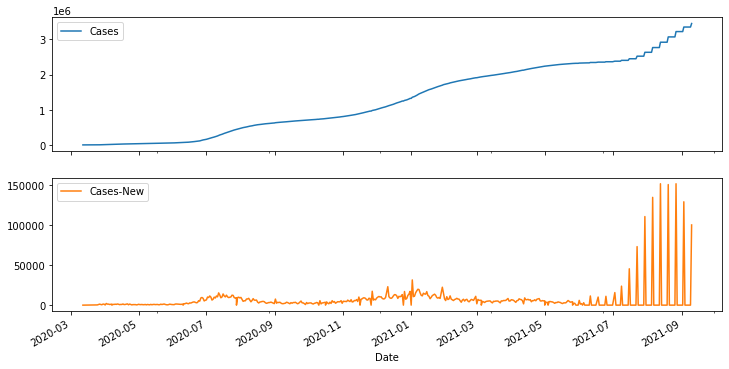

In [17]:
## Plot deaths/cases
cumulative_cols = [c for c in FL.columns for name in ['Daths','Cases']if name in c]
FL[cumulative_cols].plot(subplots=True)

In [18]:
import plotly
plotly.__version__

'5.3.1'

<AxesSubplot:>

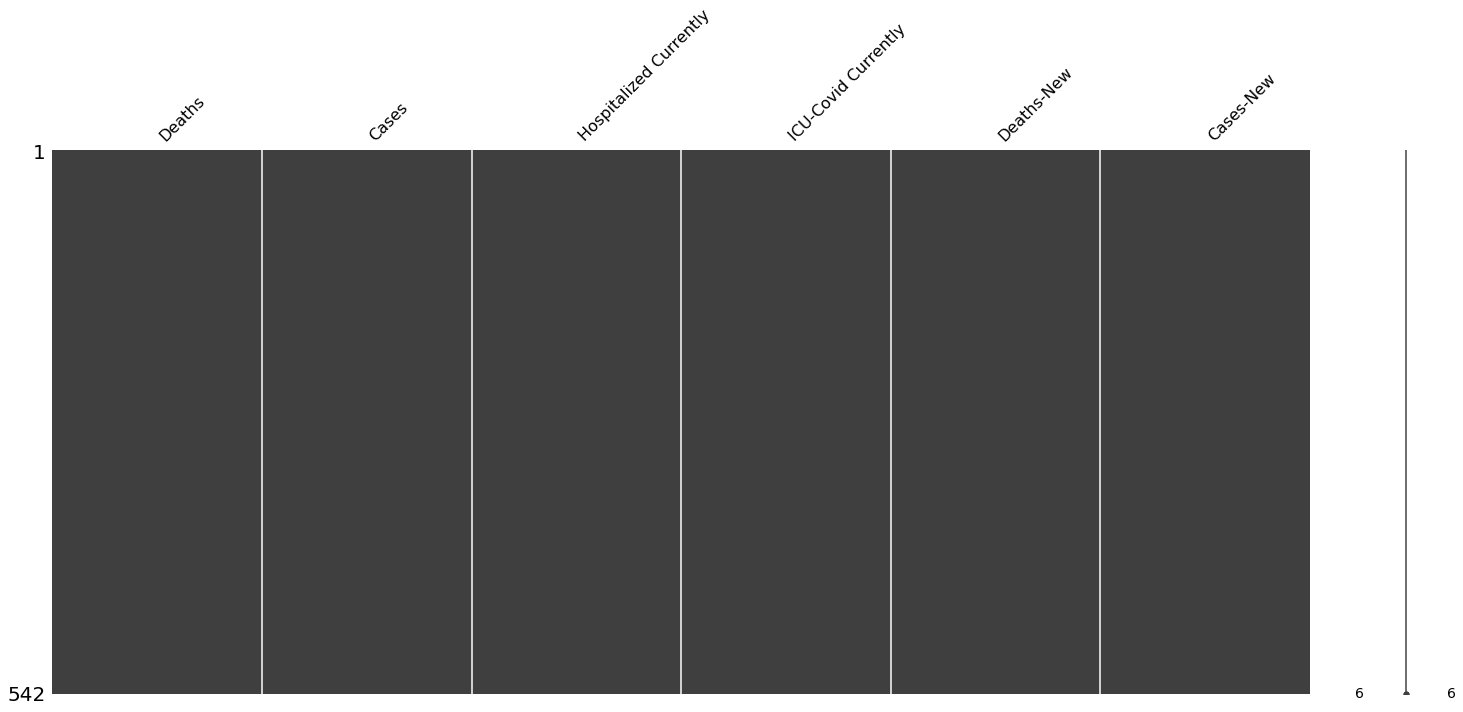

In [19]:
import missingno
missingno.matrix(FL)

In [20]:
# px.imshow(FL.isna(),template='plotly_dark',color_continuous_scale="Reds")

In [21]:
plot_cols = FL.drop(columns=cumulative_cols).columns
plot_cols

Index(['Deaths', 'Hospitalized Currently', 'ICU-Covid Currently',
       'Deaths-New'],
      dtype='object')

In [22]:
import plotly 
plotly.__version__

'5.3.1'

In [23]:
pfig = px.line(FL,y=plot_cols,width=1000,title="FL Data")
pfig.add_vline(first_ts,line_width=3,line_dash="dash",name='Start')
pfig.show()

In [24]:
# raise Exception('end of 09/01/21, though below code is still good.')

# Time Series Modeling

In [25]:
### FORECAST SPECIFIC FUNCTIONS
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

## MD

In [26]:
state = "MD"
df_state = STATES[state].loc['08-2020':].copy()
# df_state = df_state.interpolate('time')
# df_state['Deaths-New'] = df_state['Deaths'].diff()
# df_state['Cases-New'] = df_state['Cases'].diff()
df_state = df_state.resample('D').sum()

print(df_state.isna().sum())
df_state

Deaths                    0
Cases                     0
Hospitalized Currently    0
ICU-Covid Currently       0
Deaths-New                0
Cases-New                 0
dtype: int64


,Deaths,Cases,Hospitalized Currently,ICU-Covid Currently,Deaths-New,Cases-New
Date,,,,,,
2020-08-01,3506,89365,629.0,171.0,13.0,1019.0
2020-08-02,3515,90274,606.0,180.0,9.0,909.0
2020-08-03,3523,91144,574.0,176.0,8.0,870.0
2020-08-04,3530,91854,576.0,191.0,7.0,710.0
2020-08-05,3536,92426,571.0,186.0,6.0,572.0
...,...,...,...,...,...,...
2021-09-06,0,0,0.0,0.0,0.0,0.0
2021-09-07,10094,504856,800.0,230.0,21.0,1822.0
2021-09-08,10115,505557,800.0,236.0,21.0,701.0


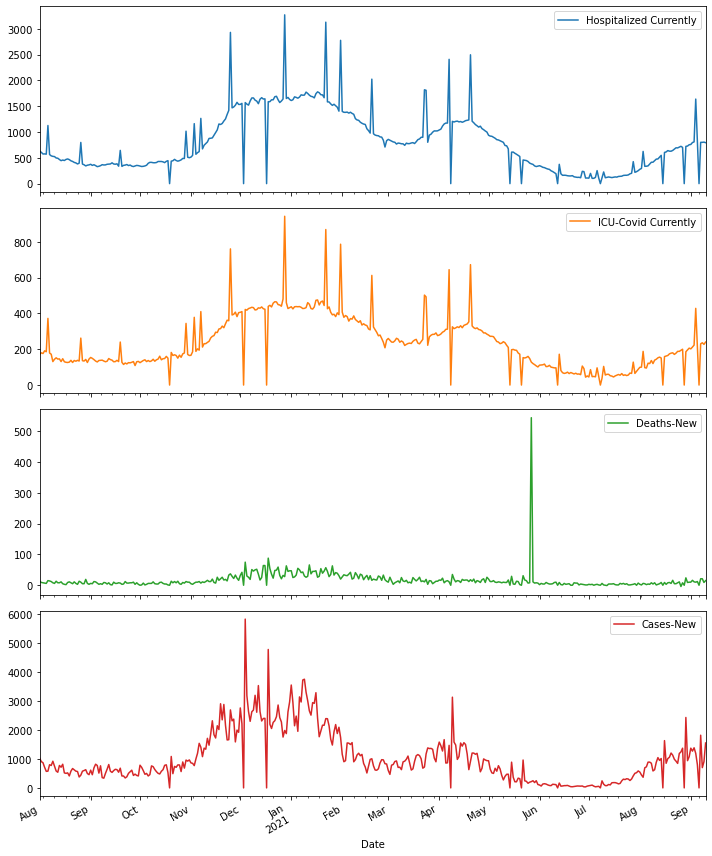

In [27]:
model_cols = ['Hospitalized Currently','ICU-Covid Currently',
              'Deaths-New','Cases-New'
             ]

## visualize
ax = df_state[model_cols].plot(subplots=True, figsize=(10,12))
plt.tight_layout();

#### Data Quality Issues
- There are strong spikes +/- that are not likely to be real values.

### MD - Cases-New

In [28]:
# col = 'Cases-New'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [29]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [30]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [31]:
# ax = decomp.seasonal.loc['01-2021'].plot(figsize=(12,5))
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [32]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [33]:
# fn.modeling.plot_acf_pacf(train,);

In [34]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [35]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [36]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [37]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

### MD - Hospitalized Currently

In [38]:
# df_state['Hospitalized Currently']

In [39]:
# col = 'Hospitalized Currently'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [40]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [41]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [42]:
# ax = decomp.seasonal.loc['01-2021'].plot()
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [43]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [44]:
# fn.modeling.plot_acf_pacf(train,);

In [45]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [46]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [47]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [48]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

## 🚨 BOOKMARK: Data Quality Issue - Deaths

- To Do: Remove outliers.
    - Try using .diff() and a high threshold for deterining outliers

### MD - Deaths-New

Text(0, 0.5, 'Deaths-New')

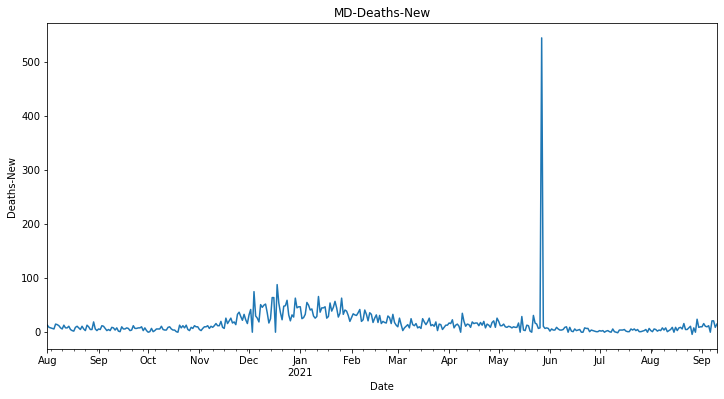

In [49]:
col = 'Deaths-New'
ts = df_state[col].copy()
ax = ts.plot(title=f"{state}-{col}");
ax.set_ylabel(col)

In [50]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]
outliers

Date
2021-05-27    536.0
2021-05-28   -533.0
Freq: D, Name: Deaths-New, dtype: float64

In [51]:
outliers= deltas[deltas.abs()>threshold]
outliers

Date
2021-05-27    536.0
2021-05-28   -533.0
Freq: D, Name: Deaths-New, dtype: float64

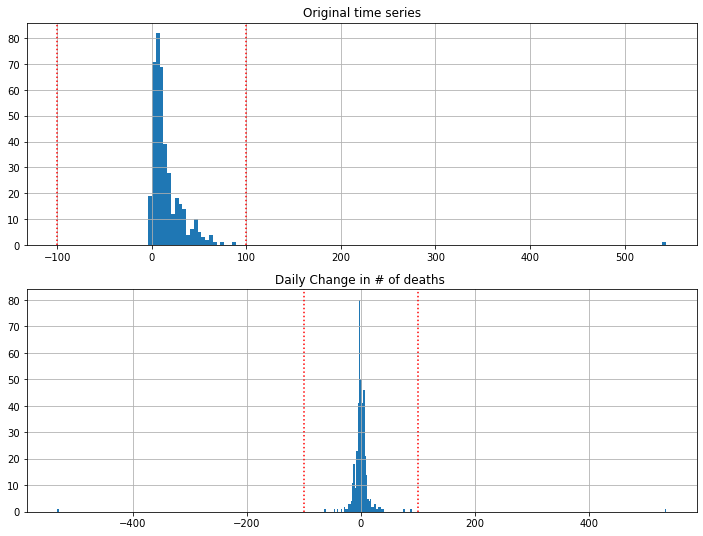

In [52]:
## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))
ax0 = ts.hist(bins='auto',ax=axes[0])
ax0.set(title='Original time series')

## saving deltas 
ax1 = deltas.hist(bins='auto',ax=axes[1])
ax1.set(title='Daily Change in # of deaths ');

for ax in axes:
    ax.axvline(threshold,ls=':',c='red')
    ax.axvline(-threshold,ls=':',c='red')

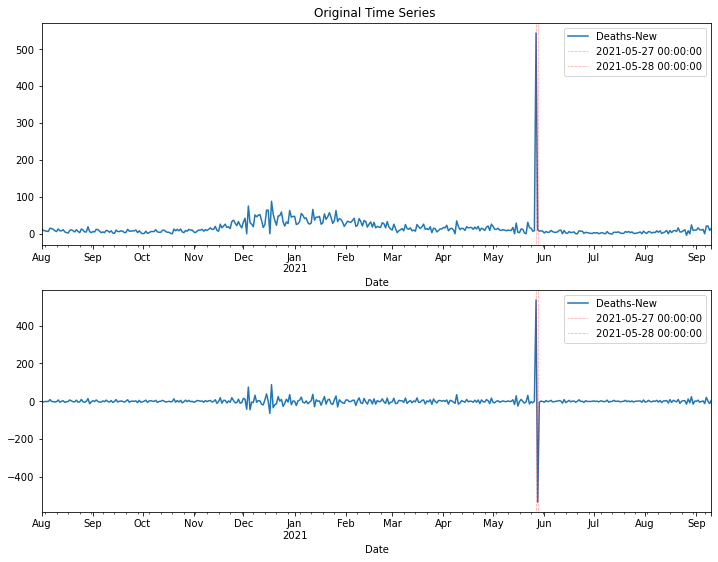

In [53]:
## Plotting High Deltas on original time seires

## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))

ax =axes[0]
ts.plot(ax = ax)
ax.set(title='Original Time Series ')

deltas.plot(ax=axes[1])
for ax in axes:
    [ax.axvline(x_val,label=x_val,lw=0.5,ls = ':',color='red') for x_val in outliers.index]
    ax.legend()



> The issues seem to be entirely in the deltas and therefore 

<AxesSubplot:xlabel='Date'>

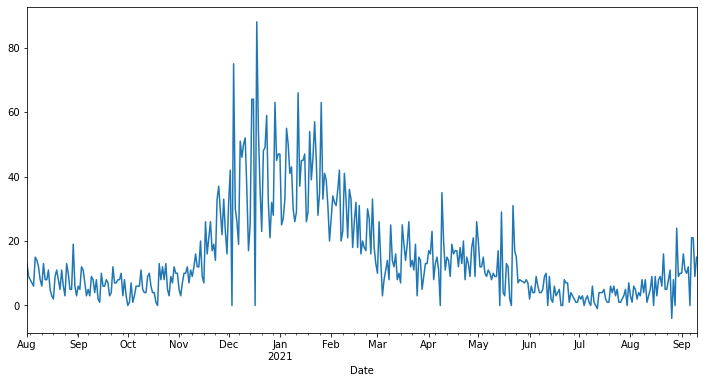

In [54]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]


## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

<AxesSubplot:xlabel='Date'>

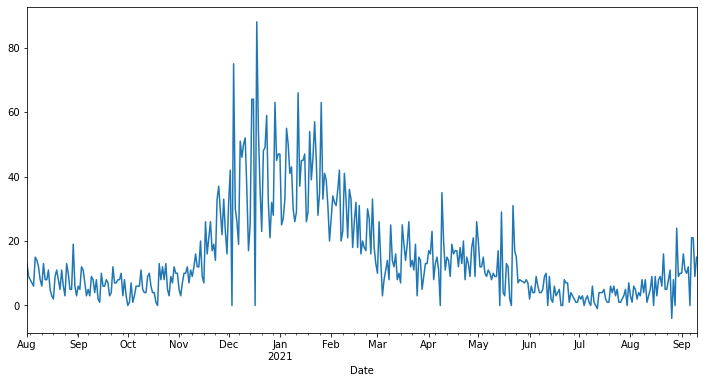

In [55]:

## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

In [56]:
# raise Exception('Deal with the data quality issue above')

#### Train Test Split

Using a cutoff index of -30, which = 08-12-2021


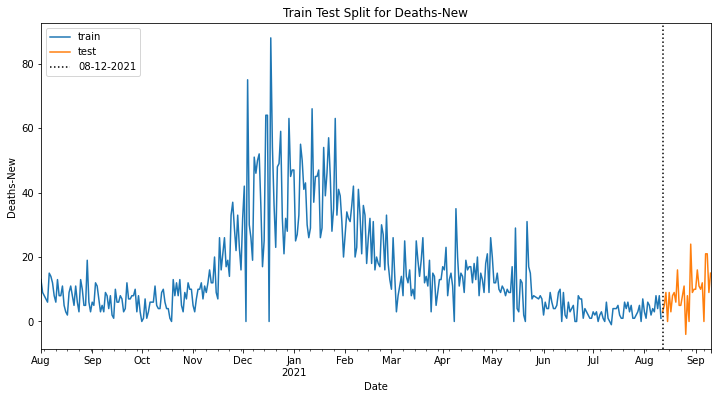

In [57]:
train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

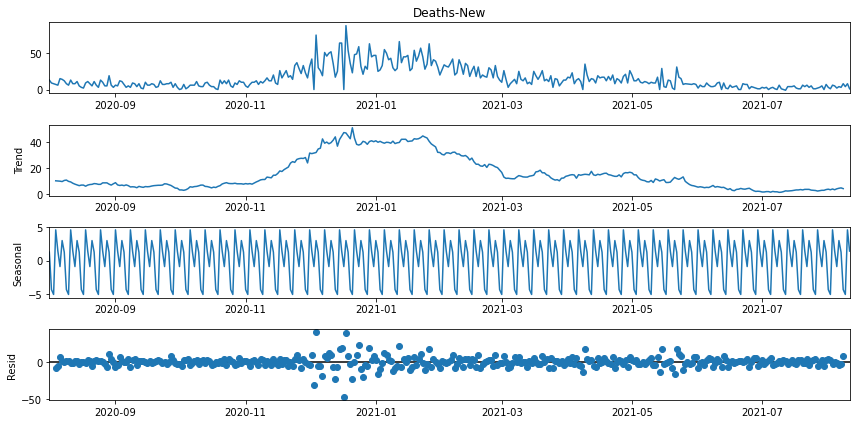

In [58]:
## Get Decomposed time sereis
decomp = tsa.seasonal_decompose(train)
decomp.plot();

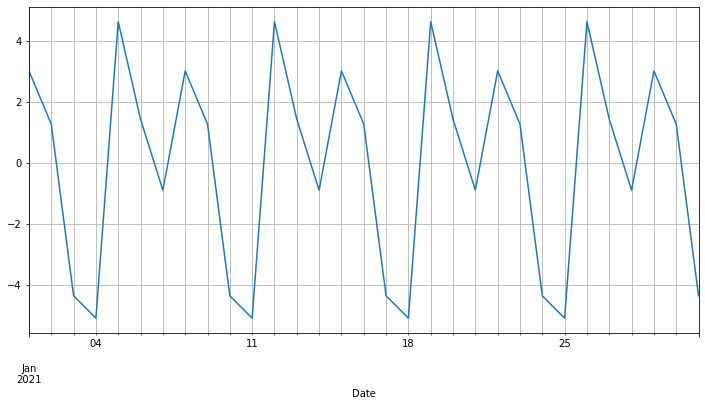

In [59]:
ax = decomp.seasonal.loc['01-2021'].plot()
ax.grid(which='both')

- Seasonality appears to be ~7 days

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-3.653193,14,354,0.004822,True,True


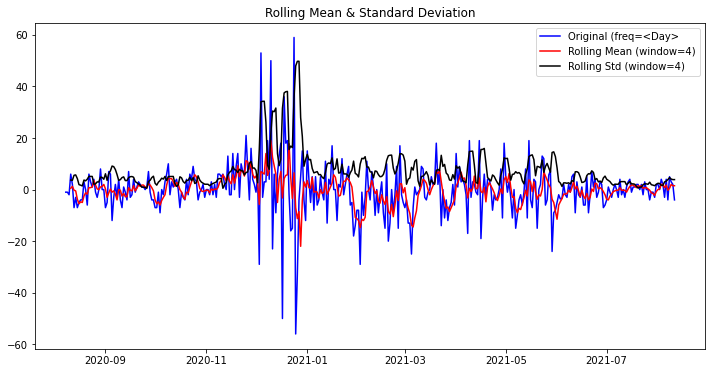

In [60]:
fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

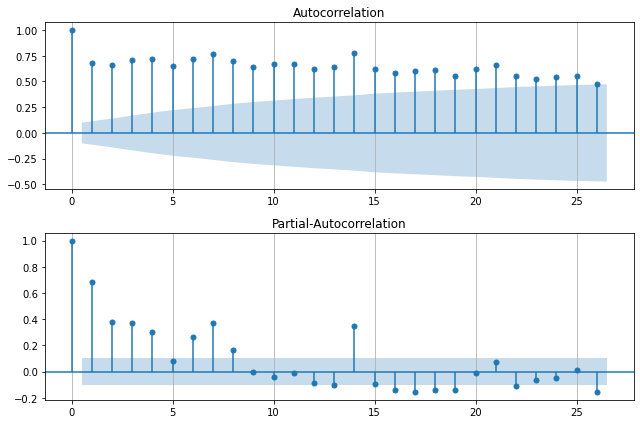

In [61]:
fn.modeling.plot_acf_pacf(train,);

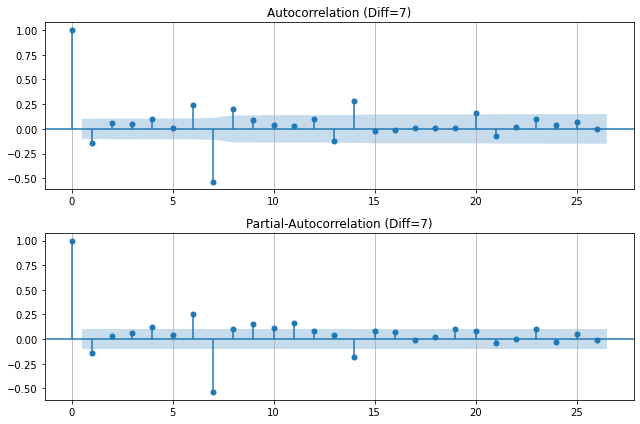

In [62]:
fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [63]:
from pmdarima import auto_arima

auto_model = auto_arima(train,m=7,trace=True,D=1,
                        start_p=0, start_q=0,
                        start_P=0, start_Q=0)
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2757.828, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2638.020, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=2669.484, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2755.874, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2752.236, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2639.472, Time=0.49 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=2639.615, Time=0.36 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=2669.047, Time=0.25 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=2641.898, Time=0.96 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=2637.960, Time=0.17 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2639.936, Time=0.44 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=2639.942, Time=0.27 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=2668.294, Time=0.15 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=2641.052, Time=0.56 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  376
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 7)   Log Likelihood               -1272.948
Date:                           Sat, 11 Sep 2021   AIC                           2561.895
Time:                                   18:40:18   BIC                           2593.182
Sample:                                        0   HQIC                          2574.324
                                           - 376                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5163      0.136     11.110      0.000       1.249       1.784
ar.L2         -0.5278      0.135     -3.924      0.000      -0.791      -0.264
ma.L1         -1.5357      0.127    -12.101      0.000      -1.784      -1.287
ma.L2          0.6344      0.106      5.962      0.000       0.426       0.843
ar.S.L7       -0.5277      0.168     -3.137      0.002      -0.857      -0.198
ma.S.L7       -0.3489      0.195     -1.786      0.074      -0.732       0.034
ma.S.L14      -0.2033      0.150     -1.355      0.175      -0.497       0.091
sigma2        57.2238      2.844     20.119      0.000      51.649      62.798
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               386.21
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.02
Prob(H) (two-sided):                  0.02   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Use Best Params for new SARIMAX

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Deaths-New   No. Observations:                  376
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 7)   Log Likelihood               -1219.459
Date:                           Sat, 11 Sep 2021   AIC                           2454.919
Time:                                   18:40:19   BIC                           2485.828
Sample:                               08-01-2020   HQIC                          2467.219
                                    - 08-11-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2426      0.185      6.723      0.000       0.880       1.605
ar.L2         -0.2562      0.182     -1.411      0.158      -0.612       0.100
ma.L1         -2.0033      1.042     -1.923      0.054      -4.045       0.038
ma.L2          0.8200      0.986      0.832      0.406      -1.112       2.752
ar.S.L7       -0.5344      0.169     -3.170      0.002      -0.865      -0.204
ma.S.L7       -0.3203      0.194     -1.649      0.099      -0.701       0.060
ma.S.L14      -0.1988      0.145     -1.372      0.170      -0.483       0.085
sigma2        29.2330     24.670      1.185      0.236     -19.119      77.585
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               316.78
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Forecasted Deaths-New'}, xlabel='Date'>)

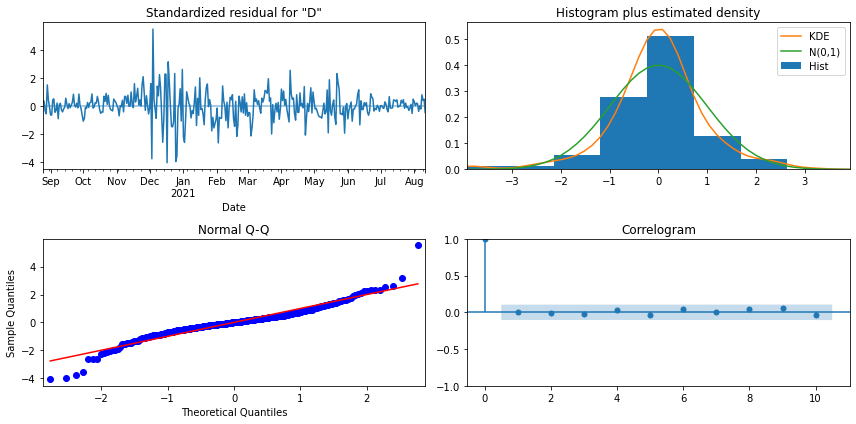

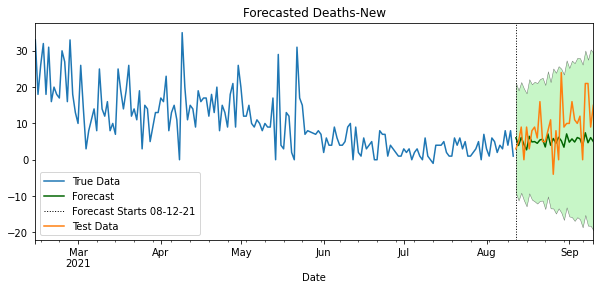

In [64]:
model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Deaths-New   No. Observations:                  406
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 7)   Log Likelihood               -1318.376
Date:                           Sat, 11 Sep 2021   AIC                           2652.751
Time:                                   18:40:22   BIC                           2684.315
Sample:                               08-01-2020   HQIC                          2665.273
                                    - 09-10-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2498      0.169      7.386      0.000       0.918       1.581
ar.L2         -0.2628      0.166     -1.580      0.114      -0.589       0.063
ma.L1         -2.1299      3.273     -0.651      0.515      -8.544       4.284
ma.L2          0.9388      3.015      0.311      0.756      -4.971       6.848
ar.S.L7       -0.5417      0.160     -3.389      0.001      -0.855      -0.228
ma.S.L7       -0.3200      0.184     -1.735      0.083      -0.681       0.041
ma.S.L14      -0.2043      0.139     -1.471      0.141      -0.477       0.068
sigma2        25.5296     73.791      0.346      0.729    -119.097     170.157
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               319.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Forecasted Deaths-New'}, xlabel='Date'>)

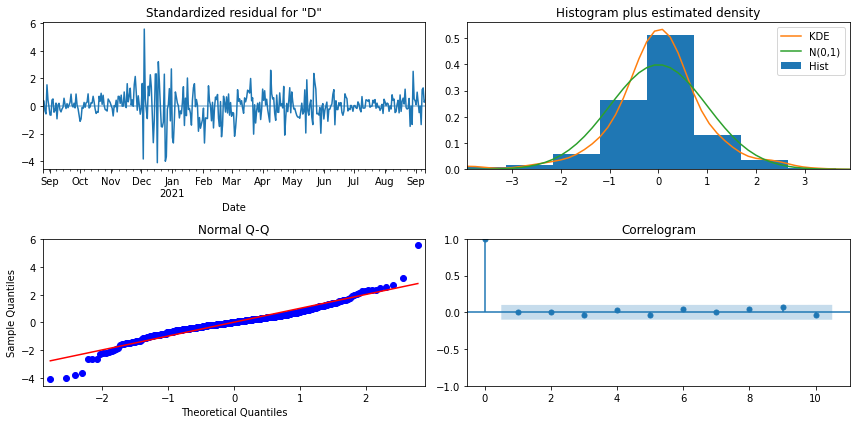

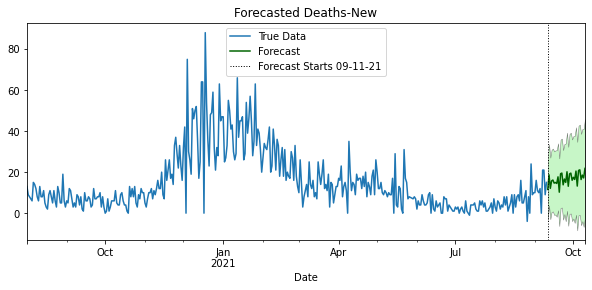

In [65]:
model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
fn.modeling.diagnose_model(model)
fn.modeling.plot_forecast(model, ts)

# Function For Any Given State/ Column

In [66]:
# state = "NY"
# col = 'Deaths'#'Hospitalized Currently'
# start_date='08-2020'
# remove_outliers=True
# threshold=100
# plot=True


# df_state = STATES[state].loc[start_date:].copy()
# df_state = df_state.resample('D').sum()
# ts = df_state[col].copy()
# ts.index.name='Datetime'

# # ts = ts.resample('D').asfreq()
# ts

# **09/09/21 TO DO: update project_functions with new `make_time_series_model`**

In [70]:
def make_timeseries_model(STATES,state = "MD",col = 'Cases-New',
                          start_date='08-2020',split_index=-30,
                         remove_outliers=True,threshold=100,
                         plot=True):
    
    eq = ' '+'==='*40
    
    auto_arima_params = dict(m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    print(eq,f"\n\tStarting pdmdarima arma grid search for {state} - {col}\n".upper(),
          eq,"\n\t\t{")
    [print(f"\t\t{k} : {v}") for k,v in auto_arima_params.items()]
    print("\t}")
    

    ## Slicing out state df for index dates 
    df_state = STATES[state].loc[start_date:].copy()
    df_state = df_state.resample('D').sum()
    ts = df_state[col].copy()

    ## Outlier removal 
    if remove_outliers:
        ## saving deltas 
        deltas  = ts.diff()

        ## SSaving outleirs
        outliers = deltas[deltas.abs()>threshold]


        ## Filling in outliers
        ts.loc[outliers.index] = np.nan
        ts.interpolate(inplace=True)
    
#     if plot:
#         ax = ts.plot(title=f"{state} - {col}");
#         ax.set_ylabel(col)
#         display(ax.get_figure())
        
        

    from pmdarima import auto_arima
    train,test = fn.modeling.train_test_split_ts(ts,split_index=split_index)
    
    ## update axis/labels
    ax = plt.gca()
    ax.set(title=f"{state} - {col}",ylabel=col);
    plt.show()
    
    

    auto_model = auto_arima(train,**auto_arima_params)
    display(auto_model.summary())
        
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)
    
    
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)
    
    return ts, model
    

## **✔ TO DO: make remove_outliers into a helper function**

```python
## TO DO: make remove_outliers into a helper function
if remove_outliers:
    ## saving deltas 
    deltas  = ts.diff()

    ## SSaving outleirs
    outliers = deltas[deltas.abs()>threshold]


    ## Filling in outliers
    ts.loc[outliers.index] = np.nan
    ts.interpolate(inplace=True)
```


In [67]:
def remove_outliers_ts(ts,threshold_type='raw',threshold=100, n_diff=1):
    ## saving deltas 
    deltas  = ts.diff(n_diff)
    
    
    ## Criterion
    if threshold_type=='raw':
        idx_outliers = deltas.abs()>threshold
        
#     elif threshold_type :
#         pass
    else:
        raise Exception("threshold_kinds are not yet implemented")
        pass
    ## SSaving outleirs
    outliers = deltas[idx_outliers]


    ## Filling in outliers
    ts.loc[outliers.index] = np.nan
    ts_out = ts.interpolate()
    
    return ts_out
     
    


<AxesSubplot:xlabel='Date'>

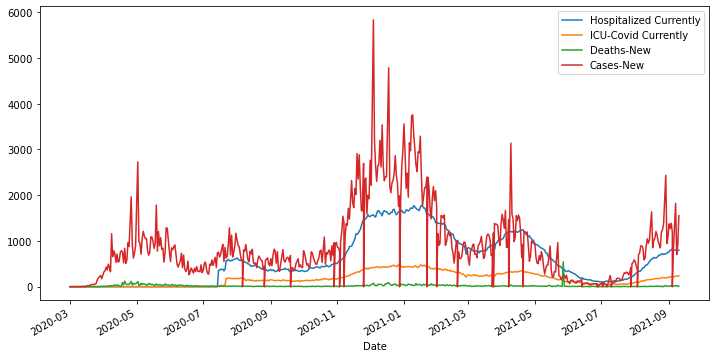

In [68]:
## test function
ts = STATES['MD'].copy()
ts.drop(['Deaths','Cases'],1).plot()

<AxesSubplot:xlabel='Date'>

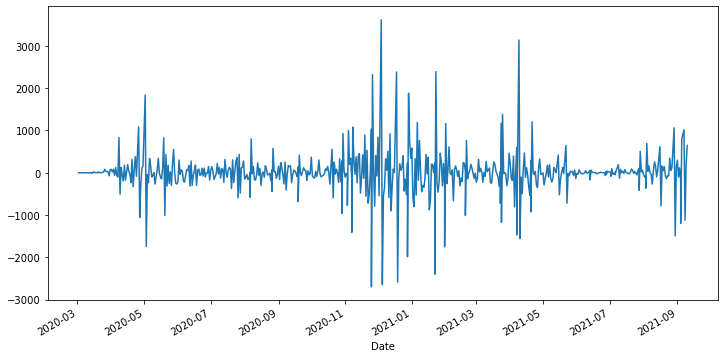

In [69]:
ts['Cases-New'].diff().plot()

	STARTING PDMDARIMA ARMA GRID SEARCH FOR NY - HOSPITALIZED CURRENTLY
		{
		m : 7
		trace : True
		D : 1
		start_p : 0
		start_q : 0
		start_P : 0
		start_Q : 0
	}
Using a cutoff index of -30, which = 08-12-2021


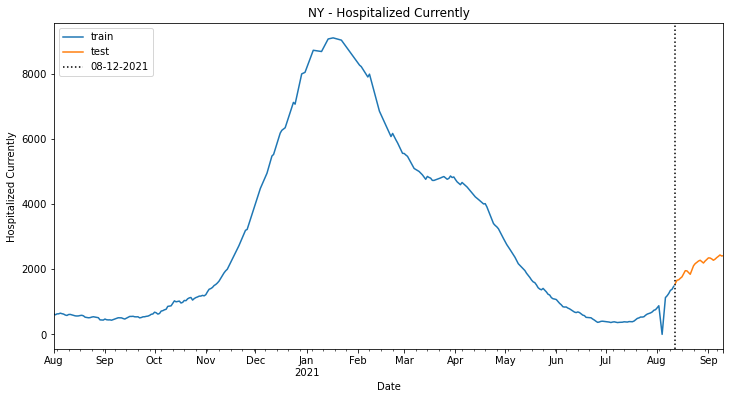

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4290.918, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=4176.979, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=4136.172, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=4219.984, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=4132.487, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=4141.246, Time=0.11 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=4127.755, Time=0.51 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=4129.012, Time=0.20 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=4129.734, Time=1.27 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=4133.977, Time=0.51 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=4229.542, Time=0.41 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=4129.653, Time=0.67 sec
 ARIMA(0,1,2)(2,1,1)[7]             : AIC=4129.629, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=4167.486, Time=0.55 sec
 ARIMA(1,1,2)(2,1,1)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  376
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 7)   Log Likelihood               -2058.877
Date:                           Sat, 11 Sep 2021   AIC                           4127.755
Time:                                   18:40:32   BIC                           4147.295
Sample:                                        0   HQIC                          4135.518
                                           - 376                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5957      0.025     23.820      0.000       0.547       0.645
ar.S.L7       -1.0828      0.224     -4.824      0.000      -1.523      -0.643
ar.S.L14      -0.4843      0.130     -3.738      0.000      -0.738      -0.230
ma.S.L7        0.4461      0.229      1.944      0.052      -0.004       0.896
sigma2      4189.8580     78.422     53.427      0.000    4036.153    4343.563
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             16957.97
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               5.26   Skew:                             1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            Hospitalized Currently   No. Observations:                  376
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 7)   Log Likelihood               -1985.596
Date:                           Sat, 11 Sep 2021   AIC                           3981.193
Time:                                   18:40:32   BIC                           4000.539
Sample:                               08-01-2020   HQIC                          3988.890
                                    - 08-11-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6000      0.026     23.136      0.000       0.549       0.651
ar.S.L7       -1.0364      0.221     -4.693      0.000      -1.469      -0.604
ar.S.L14      -0.4759      0.134     -3.542      0.000      -0.739      -0.213
ma.S.L7        0.3709      0.225      1.647      0.100      -0.070       0.812
sigma2      4344.0510     84.675     51.303      0.000    4178.091    4510.011
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             15121.38
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               4.37   Skew:                             1.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            Hospitalized Currently   No. Observations:                  406
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 7)   Log Likelihood               -2166.229
Date:                           Sat, 11 Sep 2021   AIC                           4342.458
Time:                                   18:40:33   BIC                           4362.211
Sample:                               08-01-2020   HQIC                          4350.293
                                    - 09-10-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5971      0.027     22.005      0.000       0.544       0.650
ar.S.L7        0.0774      0.074      1.049      0.294      -0.067       0.222
ar.S.L14       0.0216      0.056      0.390      0.697      -0.087       0.131
ma.S.L7       -0.7496      0.066    -11.365      0.000      -0.879      -0.620
sigma2      4619.2819     94.597     48.831      0.000    4433.875    4804.688
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):             12617.03
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

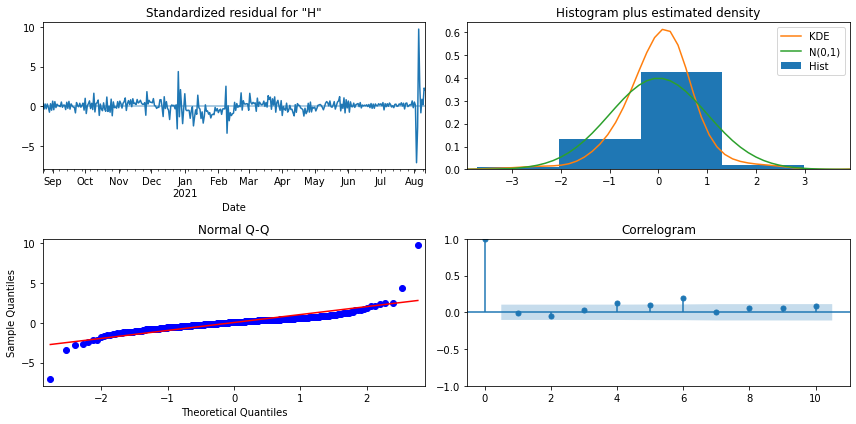

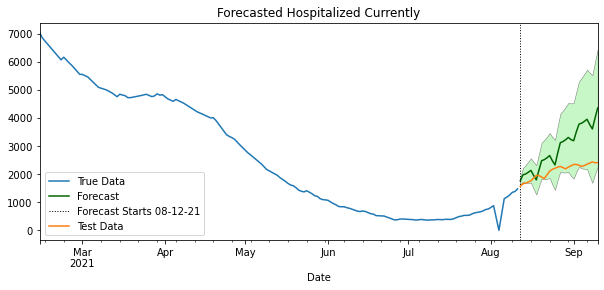

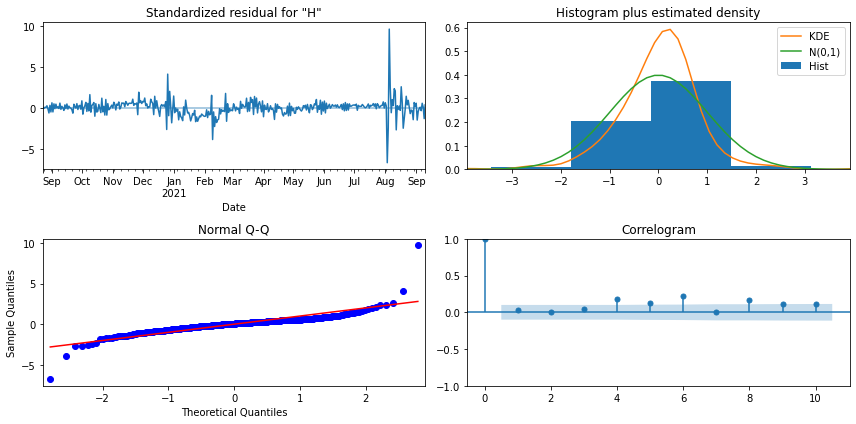

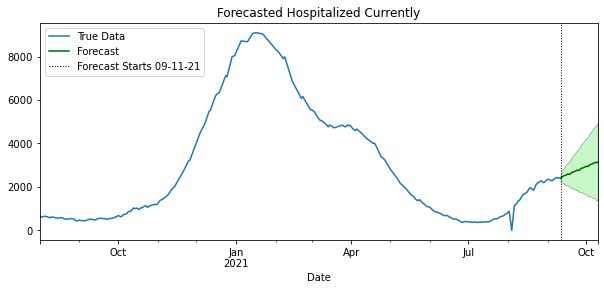

In [71]:
ts,model = make_timeseries_model(STATES,'NY','Hospitalized Currently')

In [72]:
# STATES['NY']

# Making Plotly Figures for App

In [78]:
from project_functions import app_functions as af

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [79]:
px

<module 'plotly.express' from '/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/plotly/express/__init__.py'>

# `@interact`

In [ ]:
raise Exception("stop here to avoid interactive menu")

In [73]:
from ipywidgets import interact
import datetime as dt

@interact
def get_model(state=list(STATES.keys()),
             col=list(STATES['NY'].columns),model=False):
    if model:
        start = dt.datetime.now()
        ts,model = make_timeseries_model(STATES,state,col)
        end = dt.datetime.now()
        print(f'Modeling Process took {end-start} sec.')

interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', '…

# APPENDIX

In [74]:
# !pip instal streamlit 
# !streamlist run app.py
!code app.py

### `def` modeling functions

In [75]:
# def train_test_split_ts(ts,test_size=0.9,split_index=None):
#     """Uses test size by default, split_index overrides it"""
#     if split_index is not None:
#         tts_cutoff = split_index
#     else:
#         tts_cutoff = round(ts.shape[0]*0.9)
#     fmt = "%m-%d-%Y"
#     cutoff_time = ts.index[tts_cutoff]
#     print(f"Using a cutoff index of {tts_cutoff}, which = {cutoff_time.strftime(fmt)}")
    
#       ## Use the tts cutoff to do Train test split and plot
#     train = ts.iloc[:tts_cutoff]
#     test = ts.iloc[tts_cutoff:]

#     ## Plot
#     ax = train.plot(label='train')
#     test.plot(label='test')
#     ax.legend()
#     ax.set(ylabel=ts.name)
#     ax.axvline(cutoff_time,color='k',ls=':',label=cutoff_time.strftime(fmt))
#     ax.legend()
#     ax.set_title(f"Train Test Split for {ts.name}")
#     return train, test


In [76]:
# ## funtionize diagnosing
# def diagnose_model(model): #keep
#     """Takes a fit statsmodels model and displays the .summary 
#     and plots the built-in plot.diagnostics()"""
#     display(model.summary())
#     model.plot_diagnostics()
#     plt.tight_layout()
    
    
# def get_forecast(model,steps=14): #keep
#     forecast = model.get_forecast(steps=steps)
#     forecast_df = forecast.conf_int()
#     forecast_df['Forecast'] = forecast.predicted_mean
#     forecast_df.columns = ['Lower CI','Upper CI','Forecast']
#     return forecast_df


# def plot_forecast(forecast_df,ts,orig_label='True Data',
#                   forecast_label='Forecast',
#                   forecast_steps=30,
#                   last_n_lags=None,figsize=(10,4)):
#     """Takes a forecast_df from get_df_from_pred and optionally 
#     the training/original time series.
    
#     Plots the original ts, the predicted mean and the 
#     confidence invtervals (using fill between)"""
#     if not isinstance(forecast_df,pd.DataFrame):
#         forecast_df = get_forecast(forecast_df,steps=forecast_steps)
        
#     fig,ax = plt.subplots(figsize=figsize)

#     if last_n_lags is None:
#         last_n_lags = len(ts)
        
#     ts.iloc[-last_n_lags:].plot(label='True Data')

    
#     forecast_df['Forecast'].plot(ax=ax,color='darkgreen',label=forecast_label)
#     ax.fill_between(forecast_df.index,
#                     forecast_df['Lower CI'], 
#                     forecast_df['Upper CI'],
#                     color='lightgreen',alpha=0.5,lw=0.5,edgecolor='k')
#     ax.set(title=f'Forecasted {ts.name}')
#     sep = forecast_df.index[0]
#     ax.axvline(sep,label=f"Forecast Starts {sep.strftime('%m-%d-%y')}",lw=1,ls=':',c='k')
#     ax.legend()

#     return fig,ax

    
# def evaluate_model(model,train,test,steps=None,last_n_lags=None):
#     diagnose_model(model)
    
#     if steps is None:
#         steps=len(test)
        
#     forecast_df = get_forecast(model,steps=len(test))
#     fig, ax = plot_forecast(forecast_df,train,last_n_lags=last_n_lags)
    
#     test.plot(ax=ax,label='Test Data')
#     ax.legend()
#     return fig,ax
           
 
